In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np 
from scipy import stats
import pingouin as pg
import json

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('results_ass.csv')
df['Letter'] = df['model'].str[6].str.upper()
print(f"The sample is composed by {df.shape[0]} diferent models")
print(f"DataFrame columns ({df.shape[1]}): ", list(df.columns[1:]))
df.head(5)

The sample is composed by 60 diferent models
DataFrame columns (13):  ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'directorio', 'epochs', 'frozen_layers', 'model', 'num_simulation', 'folder', 'Letter']


,Unnamed: 0,accuracy,precision,recall,f1,roc_auc,directorio,epochs,frozen_layers,model,num_simulation,folder,Letter
0,0,0.700000,0.833333,0.500000,0.625000,0.792222,model_yolov8n-cls.pt_8_100,100,8,yolov8n-cls.pt,sim_1,fold_3,N
1,1,0.700000,0.833333,0.500000,0.625000,0.804444,model_yolov8n-cls.pt_8_300,300,8,yolov8n-cls.pt,sim_1,fold_2,N
2,2,0.716667,0.842105,0.533333,0.653061,0.802222,model_yolov8n-cls.pt_8_50,50,8,yolov8n-cls.pt,sim_1,fold_2,N
3,3,0.666667,0.916667,0.366667,0.523810,0.851111,model_yolov8s-cls.pt_0_100,100,0,yolov8s-cls.pt,sim_1,fold_2,S
4,4,0.650000,0.909091,0.333333,0.487805,0.866667,model_yolov8s-cls.pt_0_300,300,0,yolov8s-cls.pt,sim_1,fold_2,S


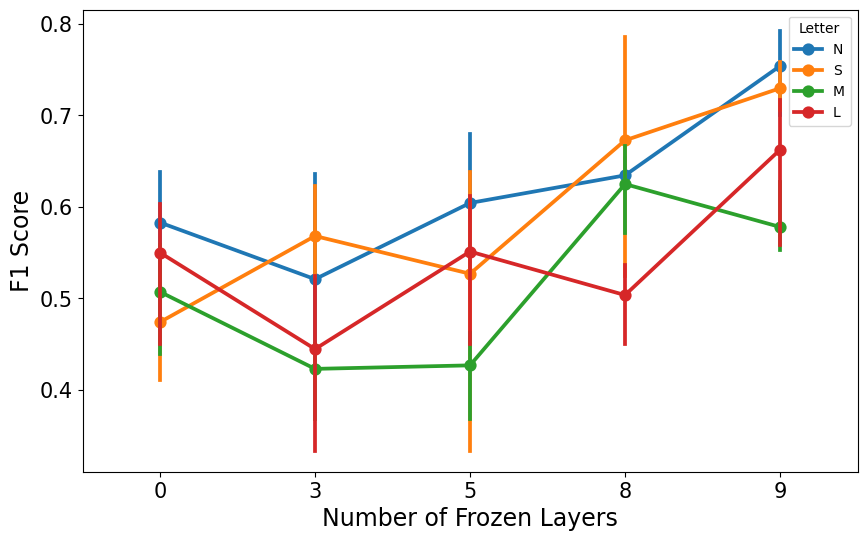

In [60]:
# Utilizando pointplot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='frozen_layers', y='f1', hue='Letter')
plt.xlabel('Number of Frozen Layers', fontsize=17)
plt.ylabel('F1 Score', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [3]:
df.Letter.value_counts()

Letter
N    15
S    15
L    15
M    15
Name: count, dtype: int64

In [4]:
# Encuentra el índice del máximo valor en la columna f1_score
indice_maximo = df['f1'].idxmax()

# Accede a la fila que contiene el máximo valor en f1_score
fila_maxima = df.loc[indice_maximo]
fila_maxima
# el report:
# https://app.evidently.cloud/projects/619dbd4a-bc10-4c9c-b0af-1224b4dadd29/reports/873c067b-2286-42b2-959d-f3e0e711373c

Unnamed: 0                                59
accuracy                            0.816667
precision                           0.913043
recall                                   0.7
f1                                  0.792453
roc_auc                             0.853333
directorio        model_yolov8n-cls.pt_9_100
epochs                                   100
frozen_layers                              9
model                         yolov8n-cls.pt
num_simulation                         sim_1
folder                                fold_2
Letter                                     N
Name: 59, dtype: object

In [5]:
metricas = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [6]:
df.model.value_counts()

model
yolov8n-cls.pt    15
yolov8s-cls.pt    15
yolov8l-cls.pt    15
yolov8m-cls.pt    15
Name: count, dtype: int64

accuracy


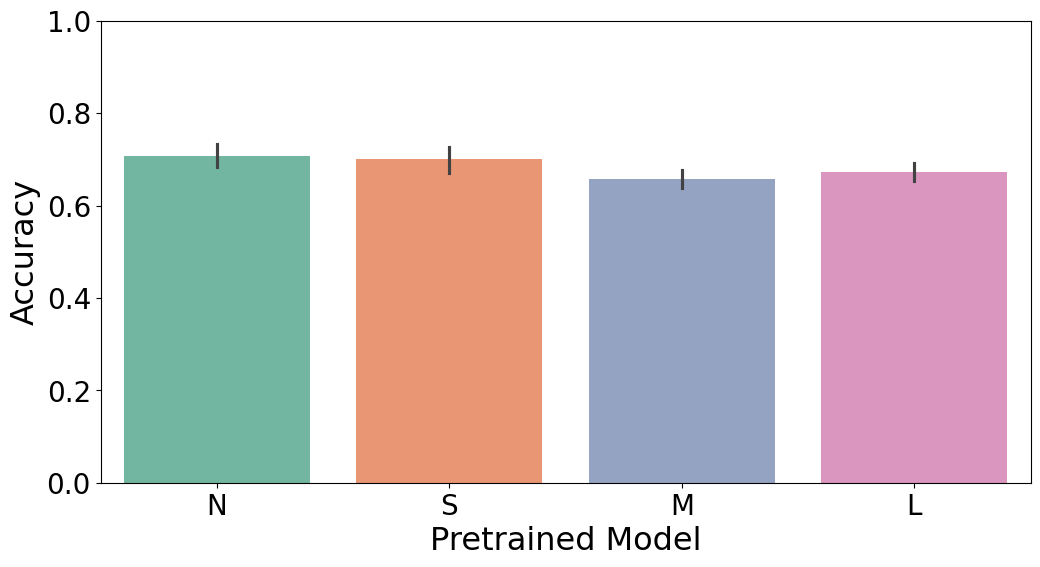

precision


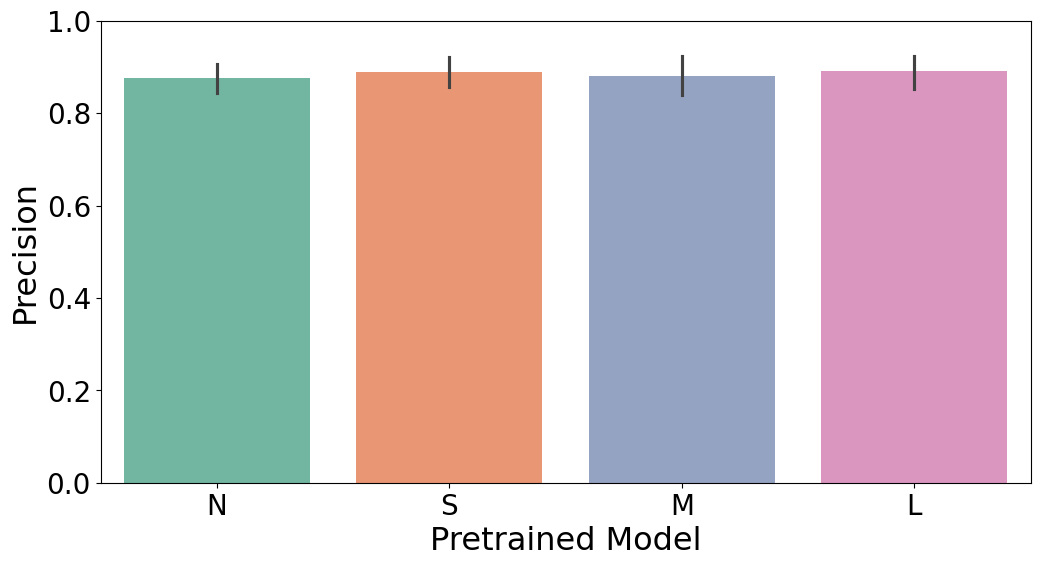

recall


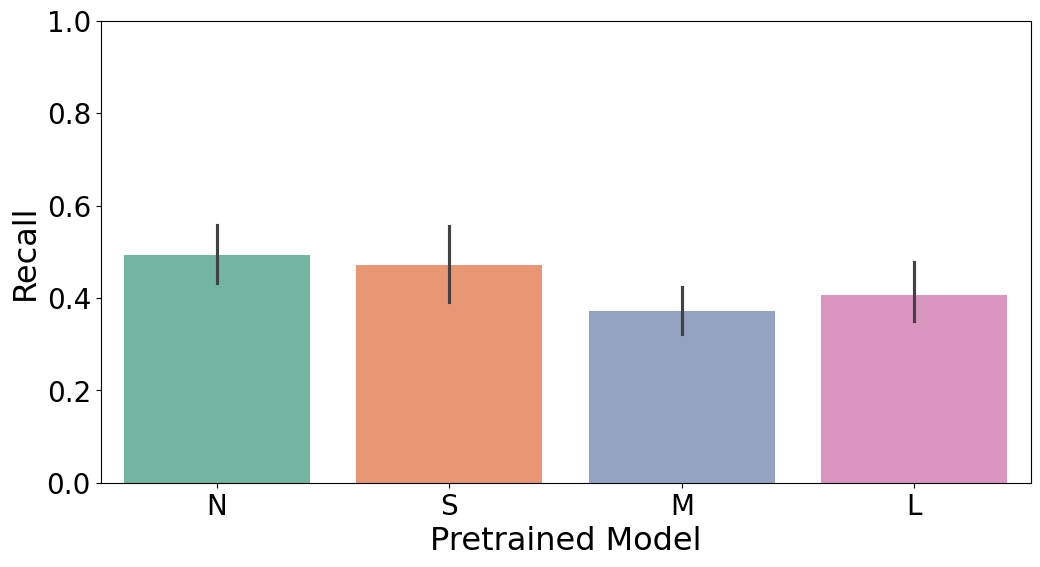

f1


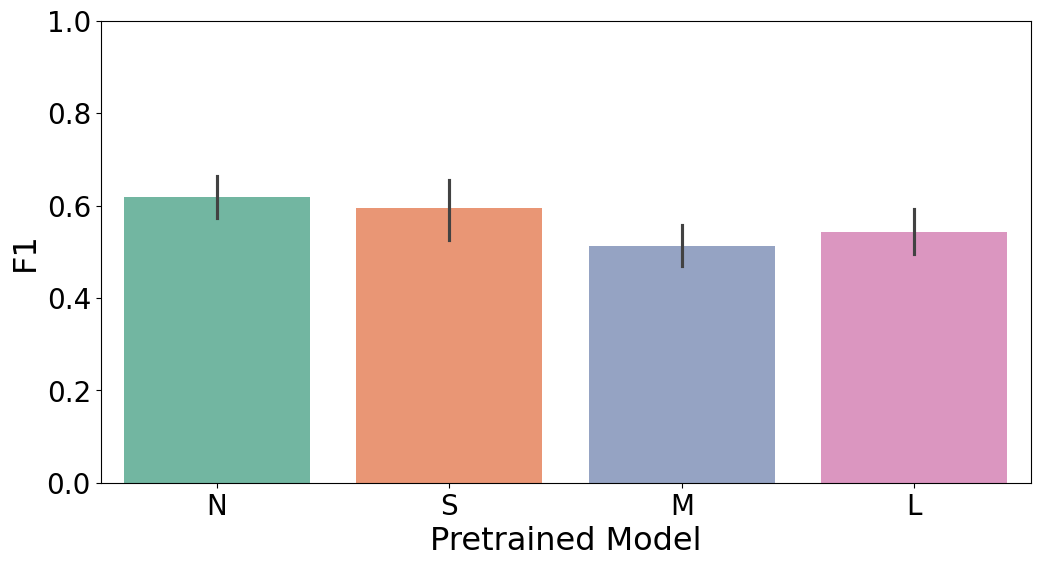

roc_auc


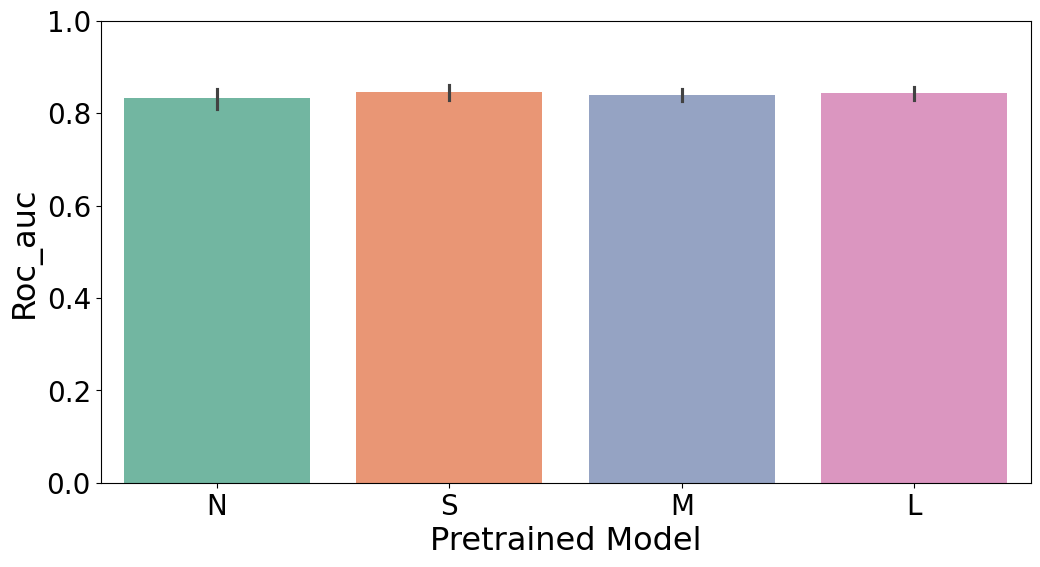

In [26]:
# Define el orden deseado de los modelos
orden_modelos = ['N', 'S', 'M', 'L']

# Asigna el orden categórico a la columna 'model' en el DataFrame df
df['Letter'] = pd.Categorical(df['Letter'], categories=orden_modelos, ordered=True)

# Crear una gráfica de barras para cada métrica
for metrica in metricas:
    print(metrica)
    plt.figure(figsize=(12, 6))
    
    # Obtener una paleta de colores con tantos colores como barras haya
    num_barras = df['Letter'].nunique()  # Número de barras
    colores = sns.color_palette("Set2", num_barras)  # Paleta de colores con tantos colores como barras
    
    # Crear el gráfico de barras asignando `hue` a `Num_conv` y desactivando la leyenda
    sns.barplot(x='Letter', y=metrica, hue='Letter', data=df, palette=colores, dodge=False, legend=False)
    
    # Configurar el título y etiquetas del gráfico
    # plt.title(f'{metrica.capitalize()} based on the PretÇrained Model')
    plt.xlabel('Pretrained Model', fontsize=23)
    plt.ylabel(metrica.capitalize(), fontsize=23)
    
    # Mostrar el gráfico
    # Establecer límites del eje Y de 0 a 1
    plt.ylim(0, 1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

In [8]:
average_accuracy = df.groupby('Letter')['accuracy'].mean()
average_accuracy

/tmp/ipykernel_1889371/395060315.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_accuracy = df.groupby('Letter')['accuracy'].mean()


Letter
N    0.707778
S    0.700000
M    0.656667
L    0.672222
Name: accuracy, dtype: float64

In [9]:
average_prec = df.groupby('Letter')['precision'].mean()
average_prec

/tmp/ipykernel_1889371/4071706951.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prec = df.groupby('Letter')['precision'].mean()


Letter
N    0.875379
S    0.889680
M    0.880584
L    0.890772
Name: precision, dtype: float64

In [10]:
average_rec = df.groupby('model')['recall'].mean()
average_rec

model
yolov8l-cls.pt    0.406667
yolov8m-cls.pt    0.371111
yolov8n-cls.pt    0.493333
yolov8s-cls.pt    0.471111
Name: recall, dtype: float64

In [11]:
average_f1 = df.groupby('model')['f1'].mean()
average_f1

model
yolov8l-cls.pt    0.542231
yolov8m-cls.pt    0.511843
yolov8n-cls.pt    0.619209
yolov8s-cls.pt    0.594191
Name: f1, dtype: float64

In [12]:
average_rocauc = df.groupby('model')['roc_auc'].mean()
average_rocauc

model
yolov8l-cls.pt    0.843630
yolov8m-cls.pt    0.838296
yolov8n-cls.pt    0.831704
yolov8s-cls.pt    0.845407
Name: roc_auc, dtype: float64

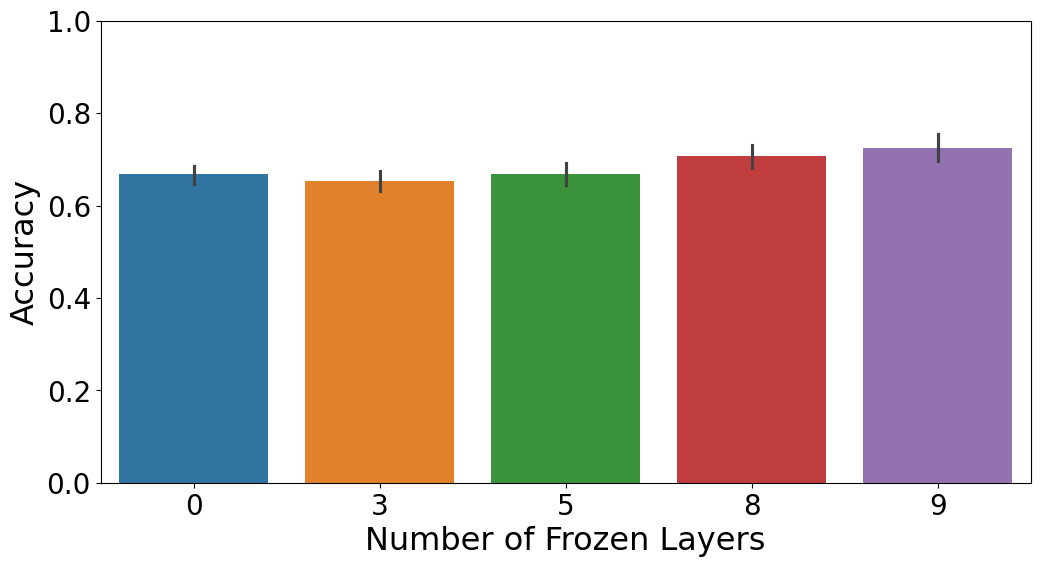

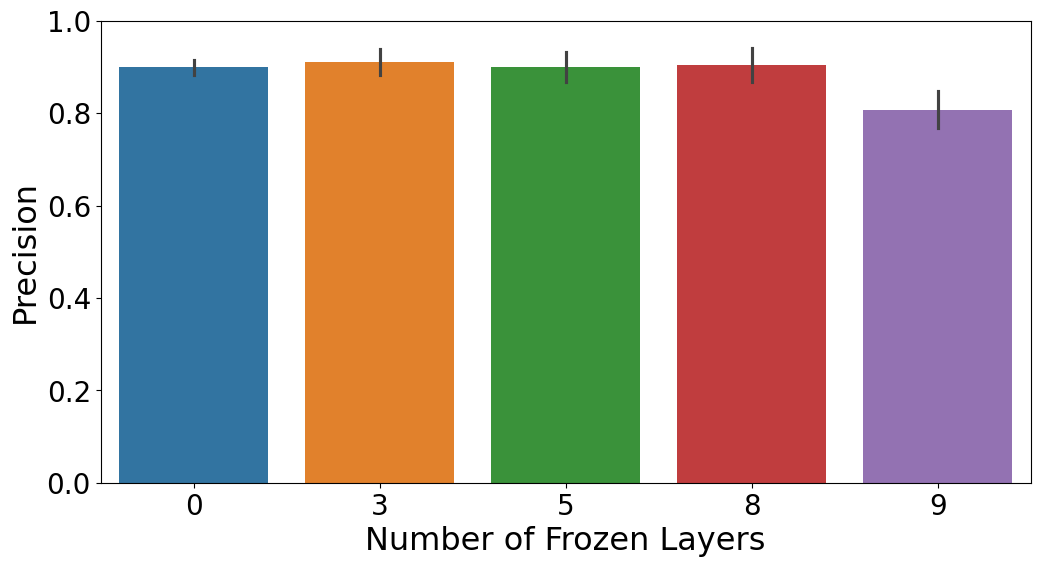

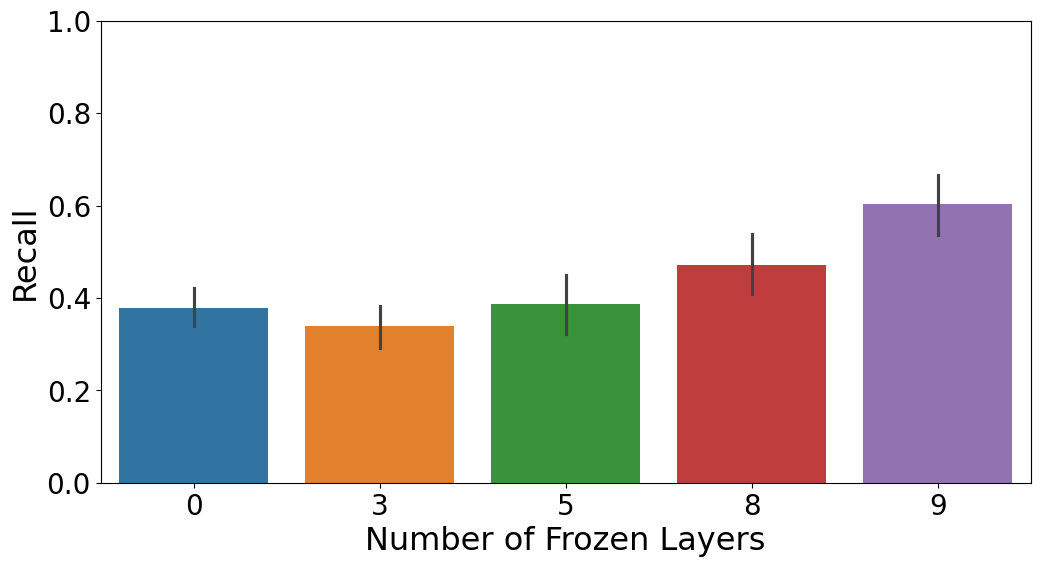

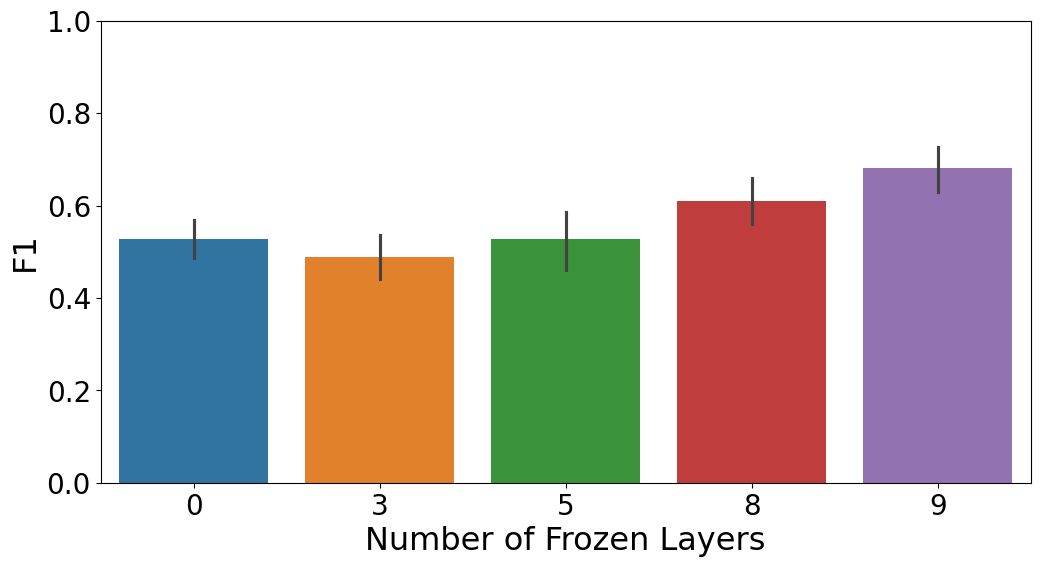

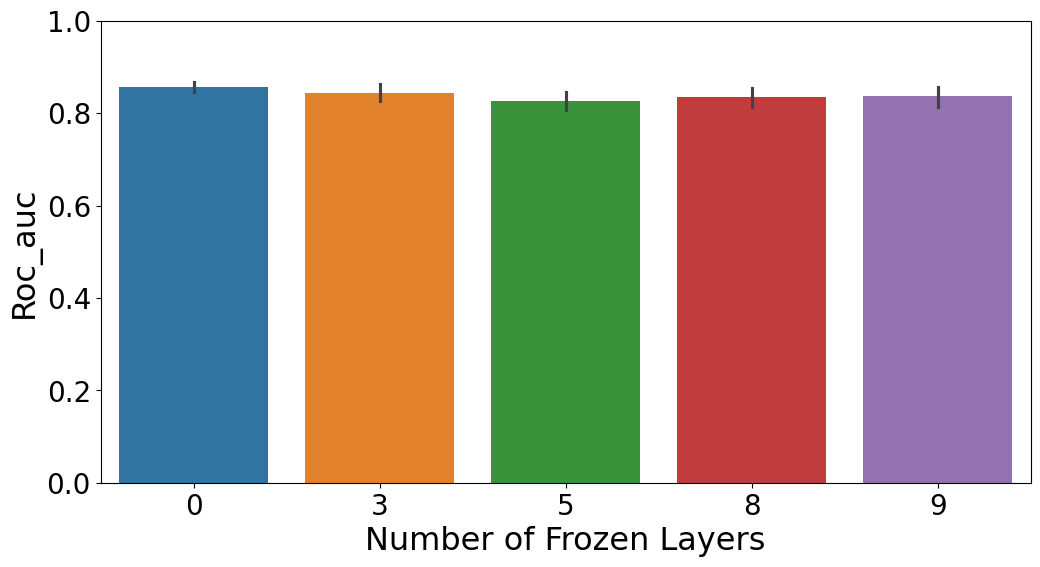

In [29]:
# Crear una gráfica de barras para cada métrica
for metrica in metricas:
   plt.figure(figsize=(12, 6))
   
   # Obtener una paleta de colores con tantos colores como barras haya
   num_barras = df['frozen_layers'].nunique()  # Número de barras
   colores = sns.color_palette("tab10", num_barras)  # Paleta de colores con tantos colores como barras
   
   # Crear el gráfico de barras asignando `hue` a `Num_conv` y desactivando la leyenda
   sns.barplot(x='frozen_layers', y=metrica, hue='frozen_layers', data=df, palette=colores, dodge=False, legend=False)
   
   # Configurar el título y etiquetas del gráfico
   # plt.title(f'{metrica.capitalize()} based on the Number of Frozen Layers')
   plt.xlabel('Number of Frozen Layers', fontsize=23)
   plt.ylabel(metrica.capitalize(), fontsize=23)
   
   # Mostrar el gráfico
      # Establecer límites del eje Y de 0 a 1
   plt.ylim(0, 1)
   plt.xticks(fontsize=20)
   plt.yticks(fontsize=20)
   plt.show()

In [14]:
average_accuracy = df.groupby('frozen_layers')['accuracy'].mean()
average_accuracy

frozen_layers
0    0.668056
3    0.652778
5    0.668056
8    0.706944
9    0.725000
Name: accuracy, dtype: float64

In [15]:
average_prec = df.groupby('frozen_layers')['precision'].mean()
average_prec

frozen_layers
0    0.900077
3    0.910951
5    0.899339
8    0.903519
9    0.806634
Name: precision, dtype: float64

In [16]:
average_rec = df.groupby('frozen_layers')['recall'].mean()
average_rec

frozen_layers
0    0.377778
3    0.338889
5    0.386111
8    0.472222
9    0.602778
Name: recall, dtype: float64

In [17]:
average_f1 = df.groupby('frozen_layers')['f1'].mean()
average_f1

frozen_layers
0    0.528398
3    0.489040
5    0.527162
8    0.608814
9    0.680929
Name: f1, dtype: float64

In [18]:
average_rocauc = df.groupby('frozen_layers')['roc_auc'].mean()
average_rocauc

frozen_layers
0    0.856111
3    0.844537
5    0.826389
8    0.835093
9    0.836667
Name: roc_auc, dtype: float64

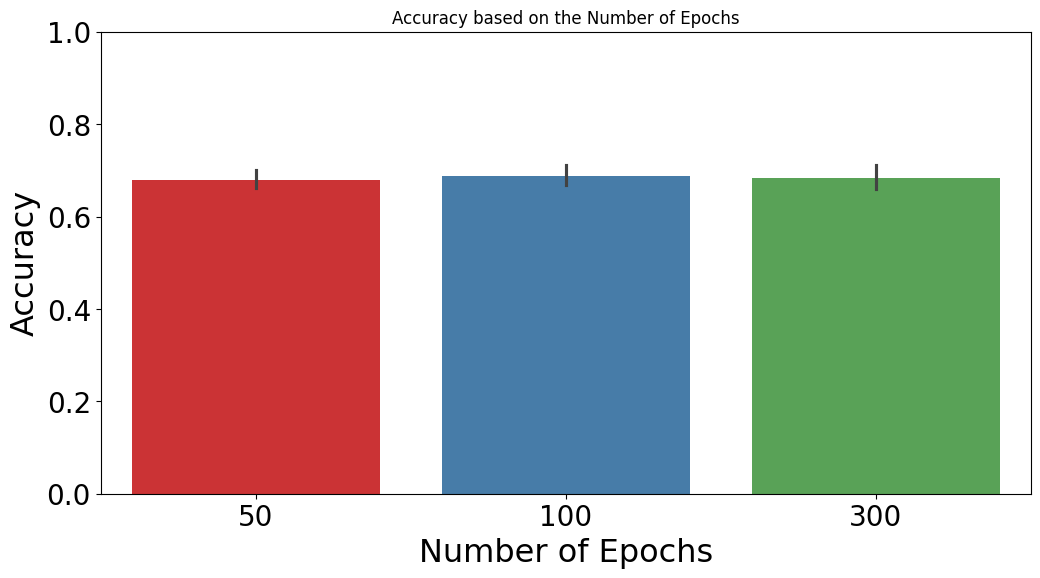

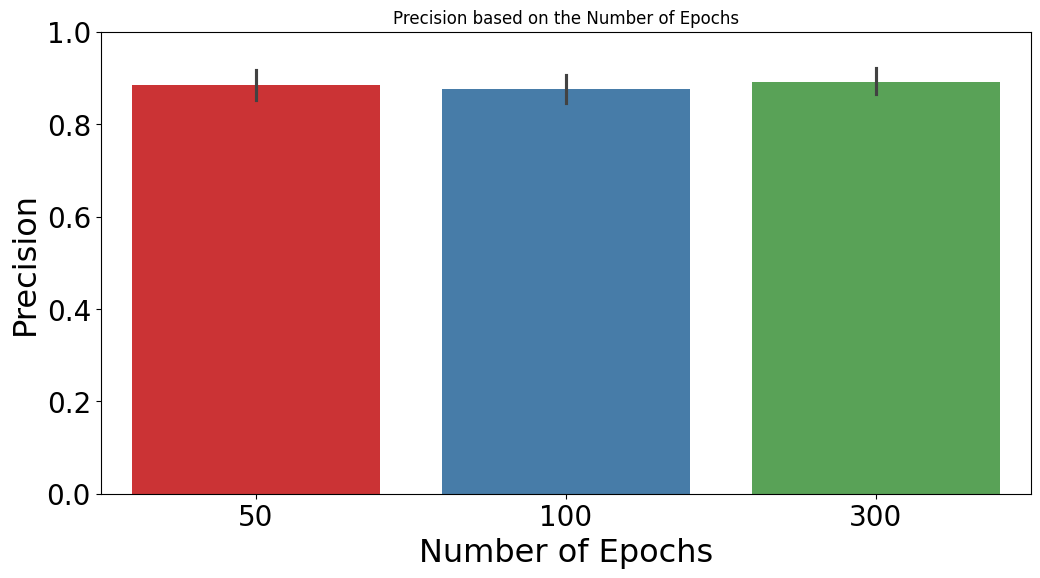

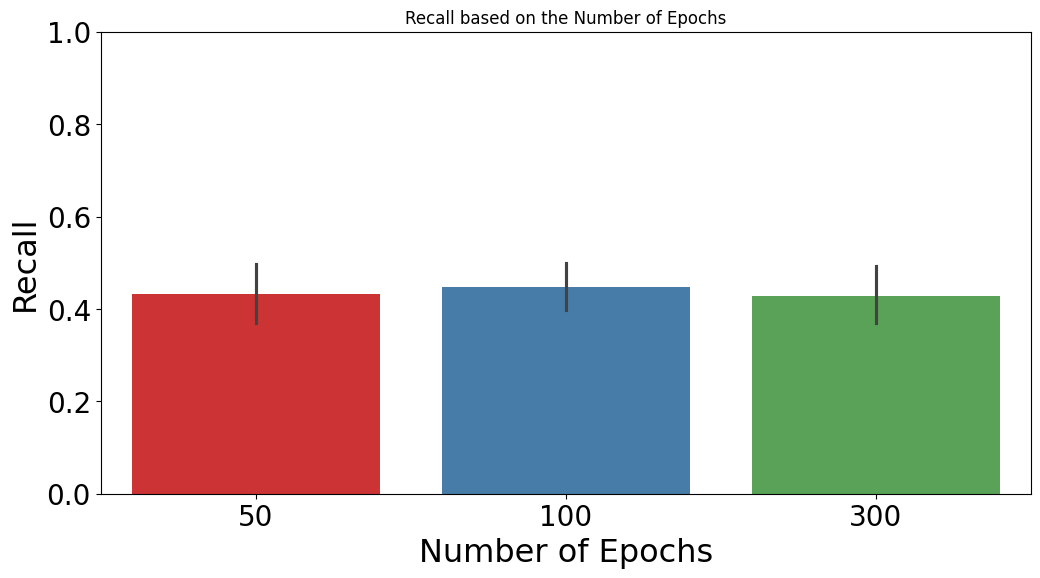

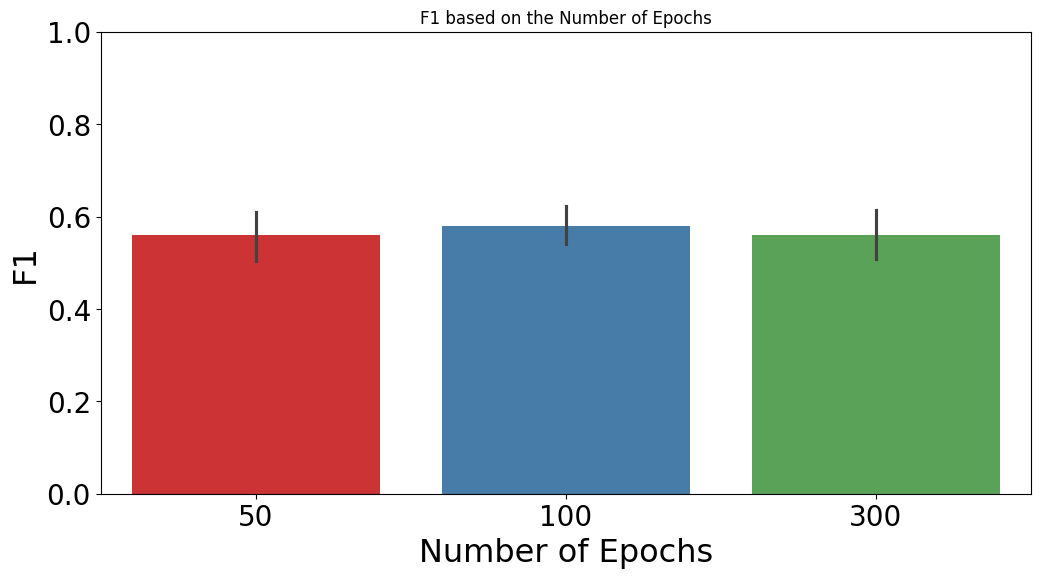

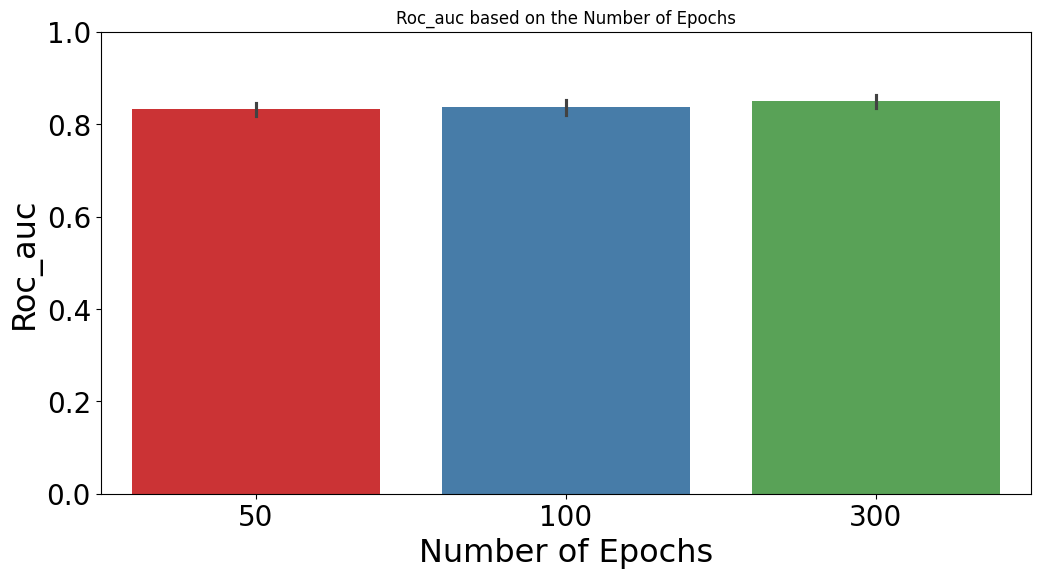

In [30]:
# Crear una gráfica de barras para cada métrica
for metrica in metricas:
    plt.figure(figsize=(12, 6))
    
    # Obtener una paleta de colores con tantos colores como barras haya
    num_barras = df['epochs'].nunique()  # Número de barras
    colores = sns.color_palette("Set1", num_barras)  # Paleta de colores con tantos colores como barras
    
    # Crear el gráfico de barras asignando `hue` a `Num_conv` y desactivando la leyenda
    sns.barplot(x='epochs', y=metrica, hue='epochs', data=df, palette=colores, dodge=False, legend=False)
    
    # Configurar el título y etiquetas del gráfico
    plt.title(f'{metrica.capitalize()} based on the Number of Epochs')
    plt.xlabel('Number of Epochs', fontsize=23)
    plt.ylabel(metrica.capitalize(), fontsize=23)
    
    # Mostrar el gráfico
       # Establecer límites del eje Y de 0 a 1
    plt.ylim(0, 1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

In [20]:
average_acc = df.groupby('epochs')['accuracy'].mean()
average_acc

epochs
50     0.680000
100    0.688333
300    0.684167
Name: accuracy, dtype: float64

In [21]:
average_prec = df.groupby('epochs')['precision'].mean()
average_prec

epochs
50     0.884644
100    0.876289
300    0.891379
Name: precision, dtype: float64

In [22]:
average_rec = df.groupby('epochs')['recall'].mean()
average_rec

epochs
50     0.431667
100    0.446667
300    0.428333
Name: recall, dtype: float64

In [23]:
average_f1 = df.groupby('epochs')['f1'].mean()
average_f1

epochs
50     0.559435
100    0.580125
300    0.561046
Name: f1, dtype: float64

In [24]:
average_rocauc = df.groupby('epochs')['roc_auc'].mean()
average_rocauc

epochs
50     0.832944
100    0.836222
300    0.850111
Name: roc_auc, dtype: float64